In [1]:
import qutip as qt
import numpy as np

# Tracking info of simulations 
import tqdm
import time
import warnings

#Saving data
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

In [2]:
import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/src')

import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots

In [3]:
def initialize_system(state_dictionary, N):
    initial_state = md.create_domain_wall_state(state_dictionary, register='Alice', one_step=True )
    final_state   = md.create_domain_wall_state(state_dictionary, register='Bob'  , one_step=True)

    initial_chain = md.initialize_general_system(N, initial_state, register='Alice')
    final_chain   = md.initialize_general_system(N, final_state, register='Bob')

    register_size = len(initial_state.dims[0])
    
    return initial_chain, final_chain, register_size

def build_hamiltonians(N, lmd, J, reg_size):

    H_transport = Ham.Hamiltonian(system_size = N,
                        mode = "transport",
                        lambda_factor = lmd,
                        global_J = J
                        )
    H_reset     = Ham.Hamiltonian(system_size = N,
                        mode = "reset",
                        lambda_factor = lmd,
                        register_size = reg_size,
                        global_J = J
                        )
    
    return H_transport, H_reset


def calculate_logs(x_data, y_data):
    log_axis = [np.log(i) for i in x_data]
    log_error = [np.log(1-i) for i in y_data]
    return log_axis, log_error

def calculate_logs_2(x_data, y_data):
    log_axis = [np.log(i) for i in x_data]
    log_error = [np.log(i) for i in y_data]
    return log_axis, log_error

In [19]:
# Define parameters
N= 10
lmd = 0.02272
J = 0.5

#Example states
# 2 QUBIT
#state_dictionary = {"11":1}
#state_dictionary = {"11":1, "00":1}
#state_dictionary = {"11":-1, "00":1, "01":1, "10":1} #C2  
 
# 3 QUBIT
state_dictionary = {"111":1, "000":1}                    # GHZ
#state_dictionary = {"001":1, "010":1, "100":1}           # W
#state_dictionary = {"000":1, "011":1, "101":1, "110":1}  # CLUSTER

ti = 0
tf = np.pi/lmd
Nsteps = 5000

In [20]:
initial_state = md.create_domain_wall_state(state_dictionary, register= "Alice", one_step=True)
final_state   = md.create_domain_wall_state(state_dictionary, register= "Bob",   one_step=True)

register_size = len(initial_state.dims[0])

initial_chain = md.initialize_general_system(N, initial_state, register='Alice')
final_chain =   md.initialize_general_system(N, final_state,   register='Bob'  )

In [21]:
H_t = Ham.Hamiltonian(system_size = N,
                    mode = "transport",
                    lambda_factor = lmd,
                    global_J = J
                    )

In [22]:
# test that algorithm works well without errors
fidelity, magnetizations, corrected_fidelity = dyn.OneStepAlgorithm(initial_chain, final_chain, H_t, ti, tf, Nsteps, factor = 1.1)
filename = dh.create_data_filename(N, J, lmd, state_dictionary, base_name="fidelity")

print(filename)

fidelity_N10_J0.5_L0.023_111_1_000_1_20251027_141758


0.9942148312065058


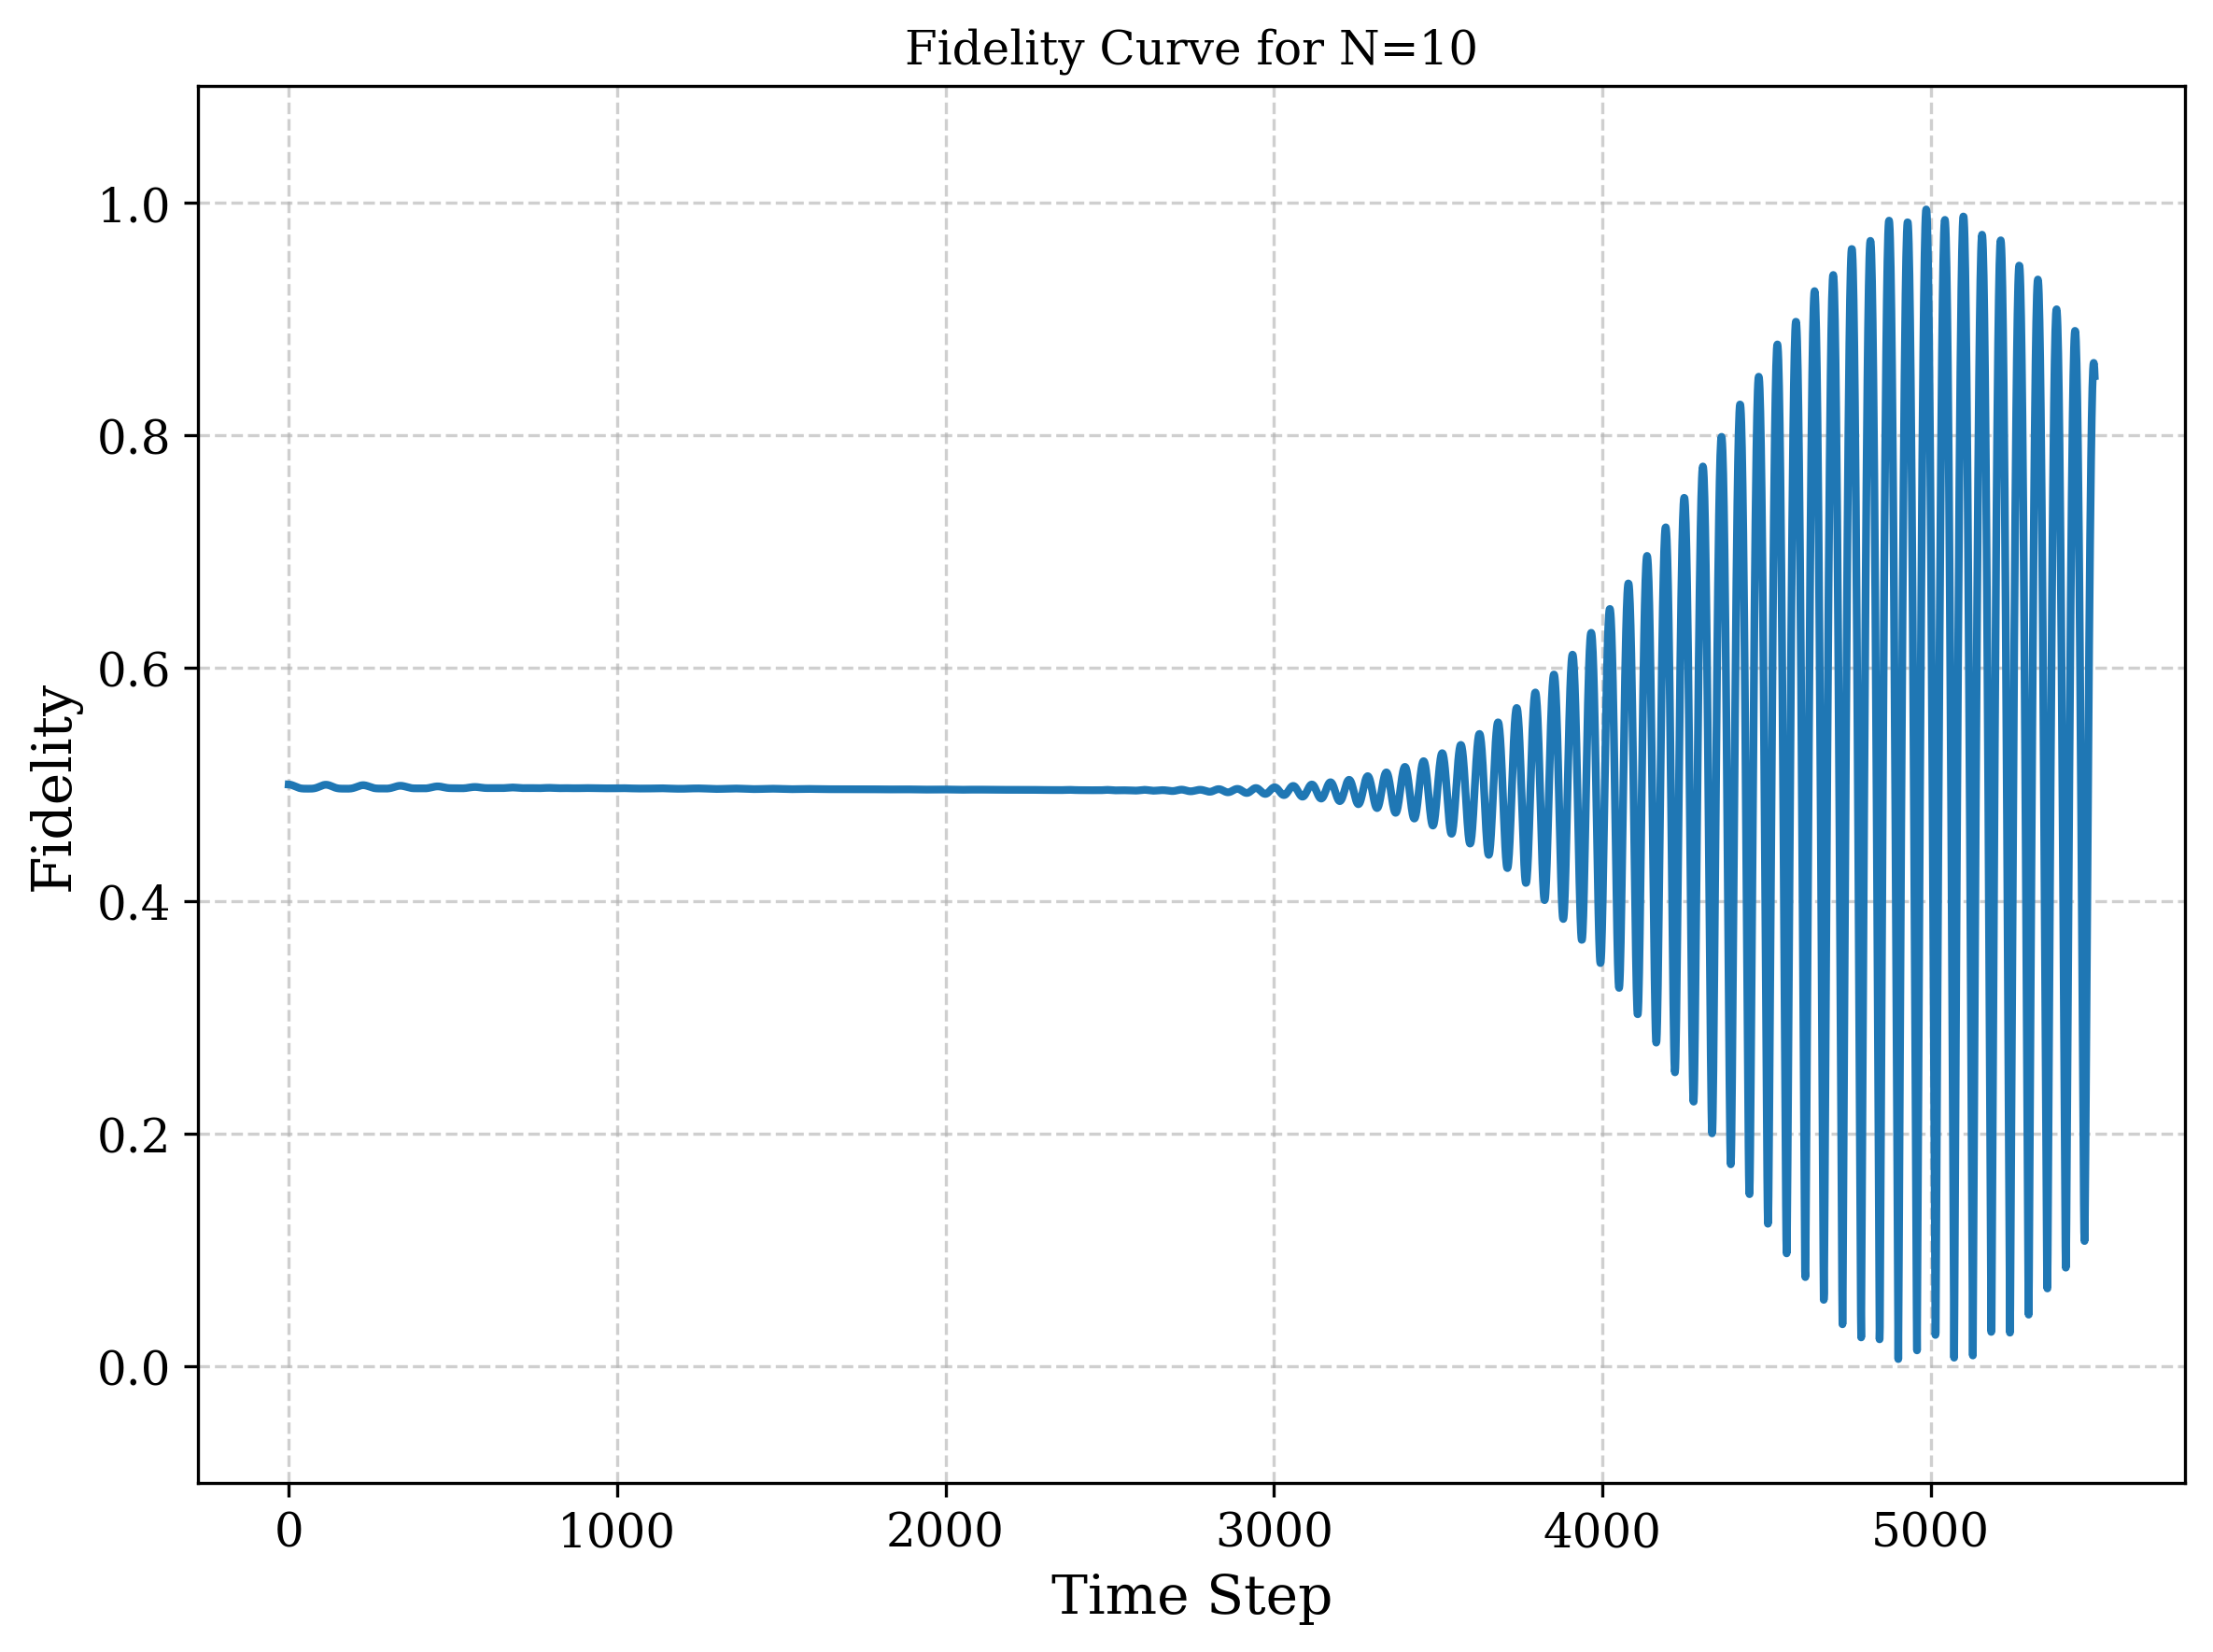

In [23]:
print(max(fidelity))
plots.plot_fidelity(fidelity, N)

In [8]:
# print(filename)
# dh.save_numpy_array(fidelity, f'../../files/data_files/fidelity/paper_revision/{filename}')

In [9]:
print(filename)

fidelity_N13_J0.5_L0.023_001_1_010_1_100_1_20251027_141655


In [10]:
from pathlib import Path

def find_files_by_extension(folder_path, extension):
    """
    Scans a folder and prints all files with the specified extension (full paths).
    
    :param folder_path: (str) Path to the folder to scan
    :param extension: (str) File extension to look for
    """
    folder = Path(folder_path)
    
    # Check if folder exists
    if not folder.exists():
        print(f"Error: Folder '{folder_path}' does not exist.")
        return
    if not folder.is_dir():
        print(f"Error: '{folder_path}' is not a directory.")
        return
    
    print(f"Files with extension '{extension}' in '{folder_path}':")
    print("-" * 50)
    
    # Find all files with the extension
    pattern = f"*{extension}" if extension.startswith('.') else f"*.{extension}"
    found_files = list(folder.glob(pattern))
    
    for file_path in found_files:
        if file_path.is_file():
            print(file_path.absolute())  # Full absolute path
    
    if not found_files:
        print(f"No files with extension '{extension}' found.")
    else:
        print(f"\nTotal files found: {len(found_files)}")

In [11]:
find_files_by_extension('../../files/data_files/fidelity/paper_revision/', '.npy')


Files with extension '.npy' in '../../files/data_files/fidelity/paper_revision/':
--------------------------------------------------
/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/notebooks/../../files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_001_1_010_1_100_1_20251023_123705.npy
/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/notebooks/../../files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_111_1_000_1_20251023_123632.npy
/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/notebooks/../../files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_000_1_011_1_101_1_20251023_123727.npy
/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/notebooks/../../files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_11_-1_00_1_01_1_20251023_123601.npy
/Users/omichel/Desktop/qilimanjaro/projects/quantum_tra

In [12]:
fidelity_11        = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_11_1_20251023_123506')
fidelity_bell      = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_11_1_00_1_20251023_123534')
fidelity_cluster_2 = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_11_-1_00_1_01_1_20251023_123601')
fidelity_ghz       = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_111_1_000_1_20251023_123632')
fidelity_w         = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_001_1_010_1_100_1_20251023_123705')
fidelity_cluster_3 = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_000_1_011_1_101_1_20251023_123727')

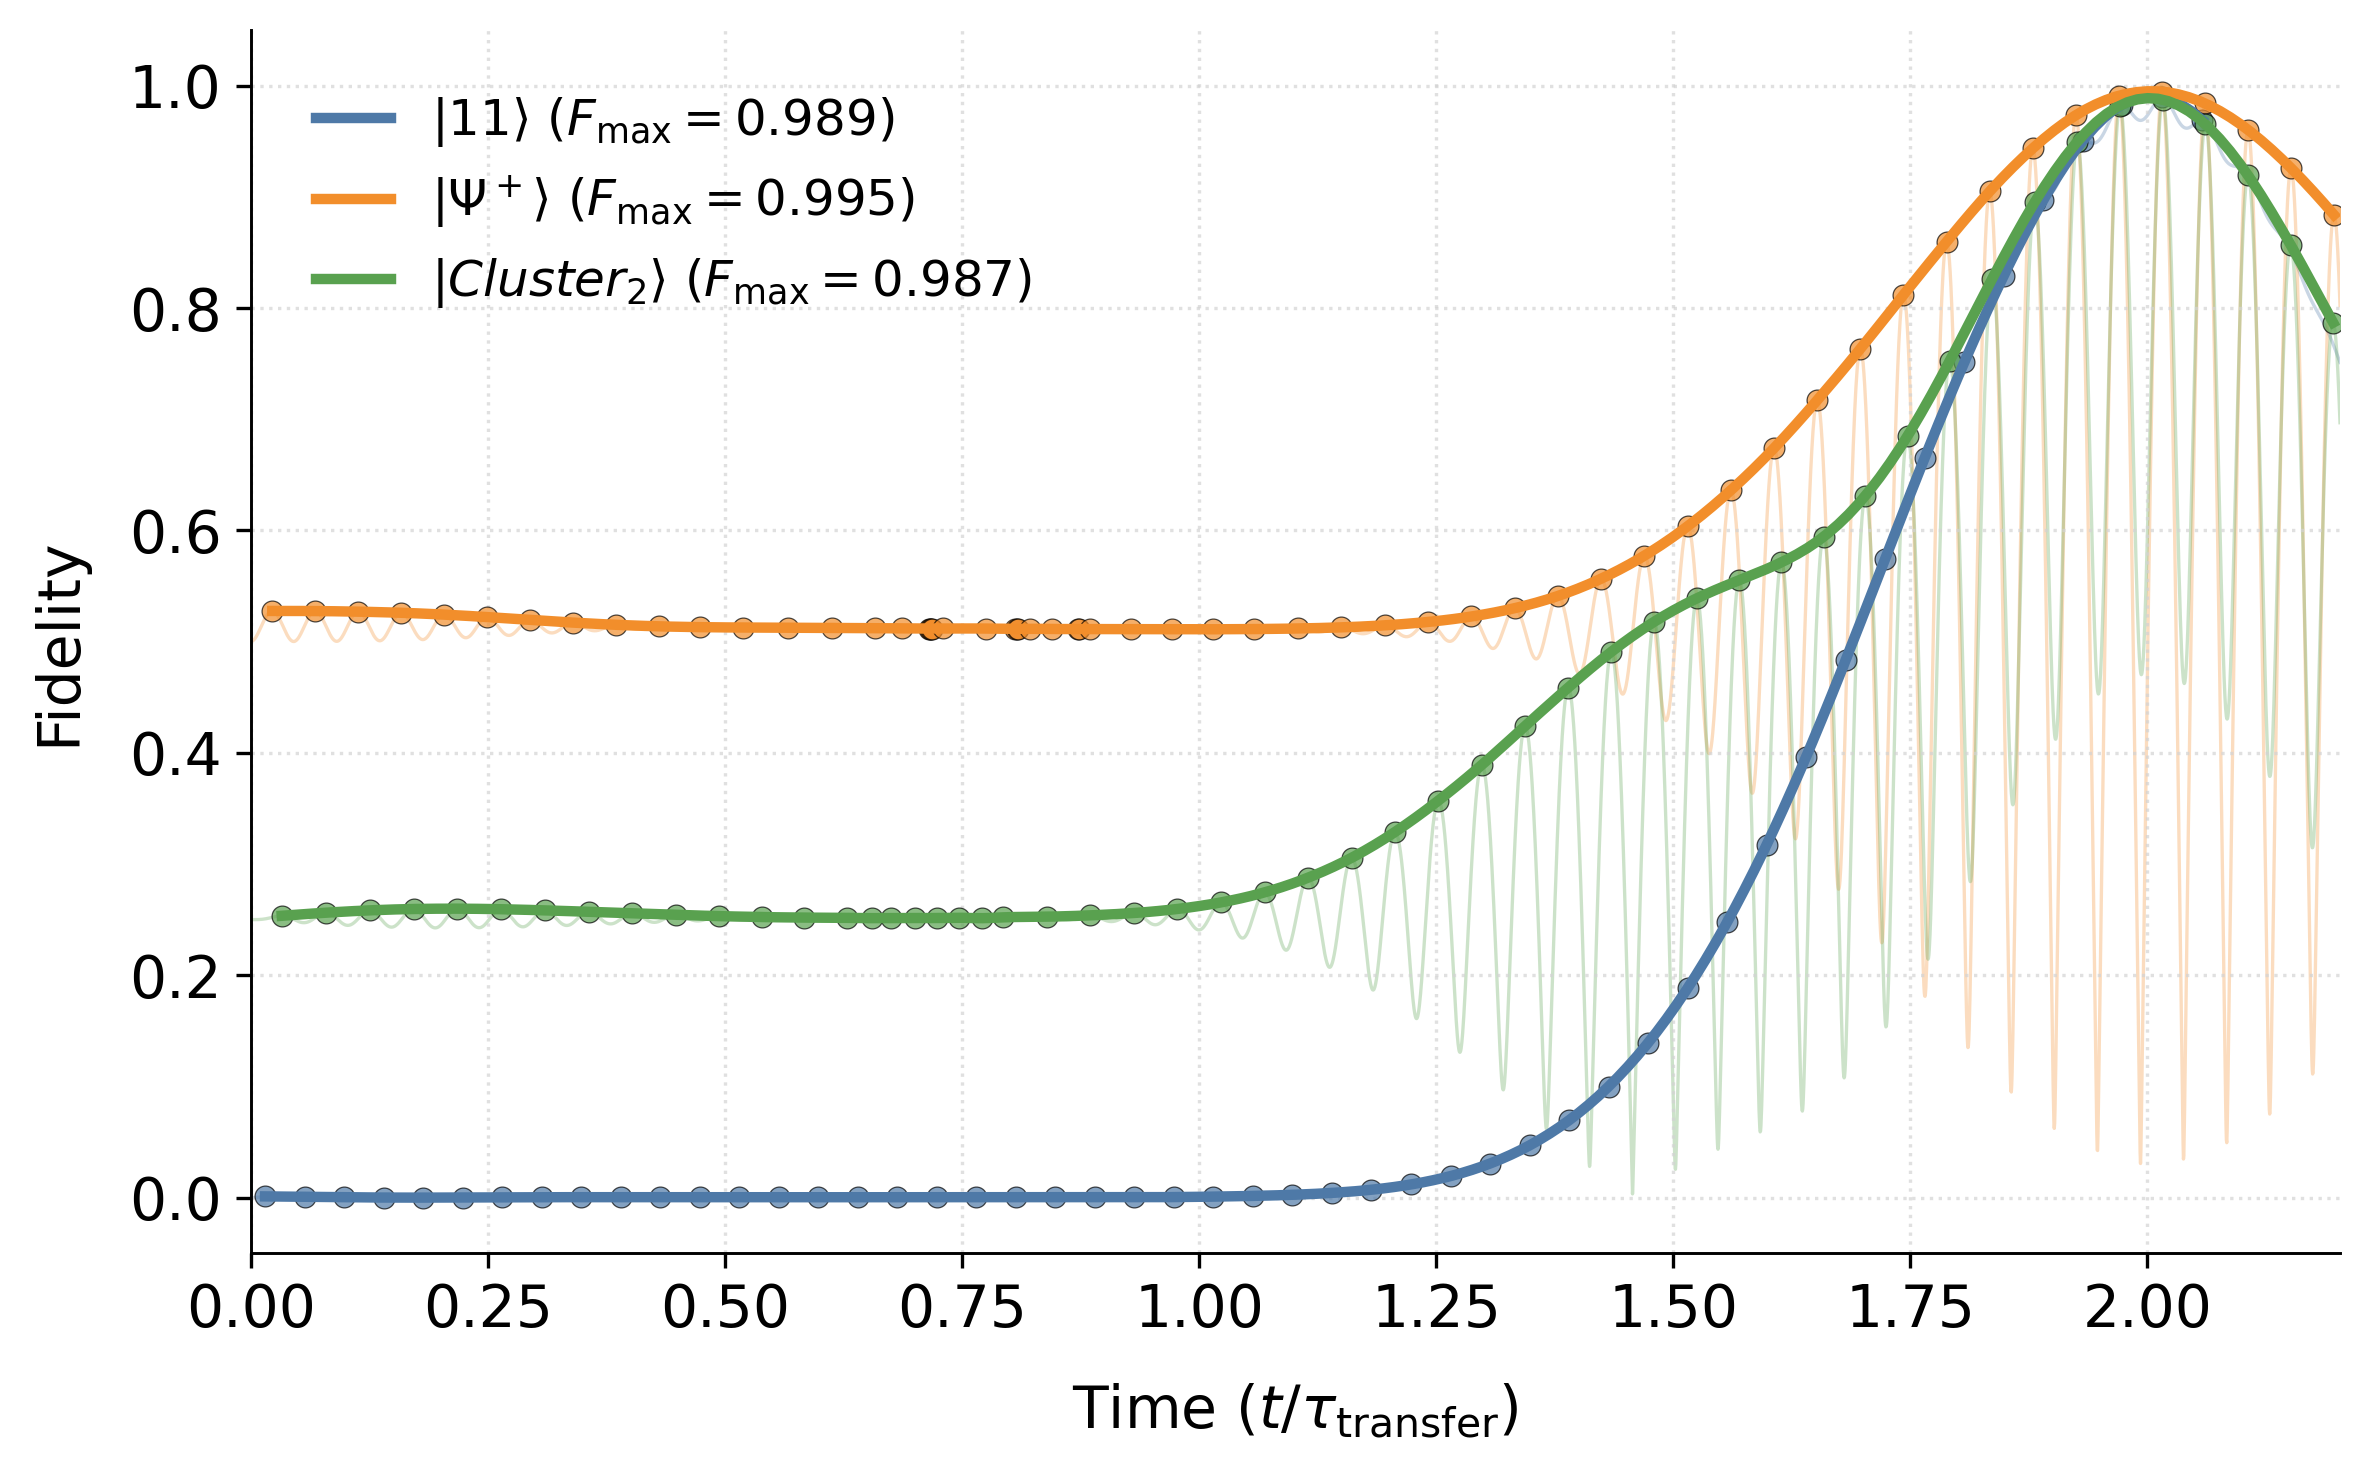

In [13]:

plots.plot_three_fidelity_curves(
    num_steps=len(fidelity_cluster_3),
    fidelity_data_list=[fidelity_11, fidelity_bell, fidelity_cluster_2],
    labels=[r'$|11\rangle$', r'$|\Psi^+\rangle$', r'$|Cluster_2\rangle$'],
    min_peak_height=0.25,
    min_peak_frequency=0.001,        # Stricter frequency threshold
    marker_frequency=15,           # More frequent markers
    filepath="/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/figures/fidelity/paper_revision/2_qubit"
)

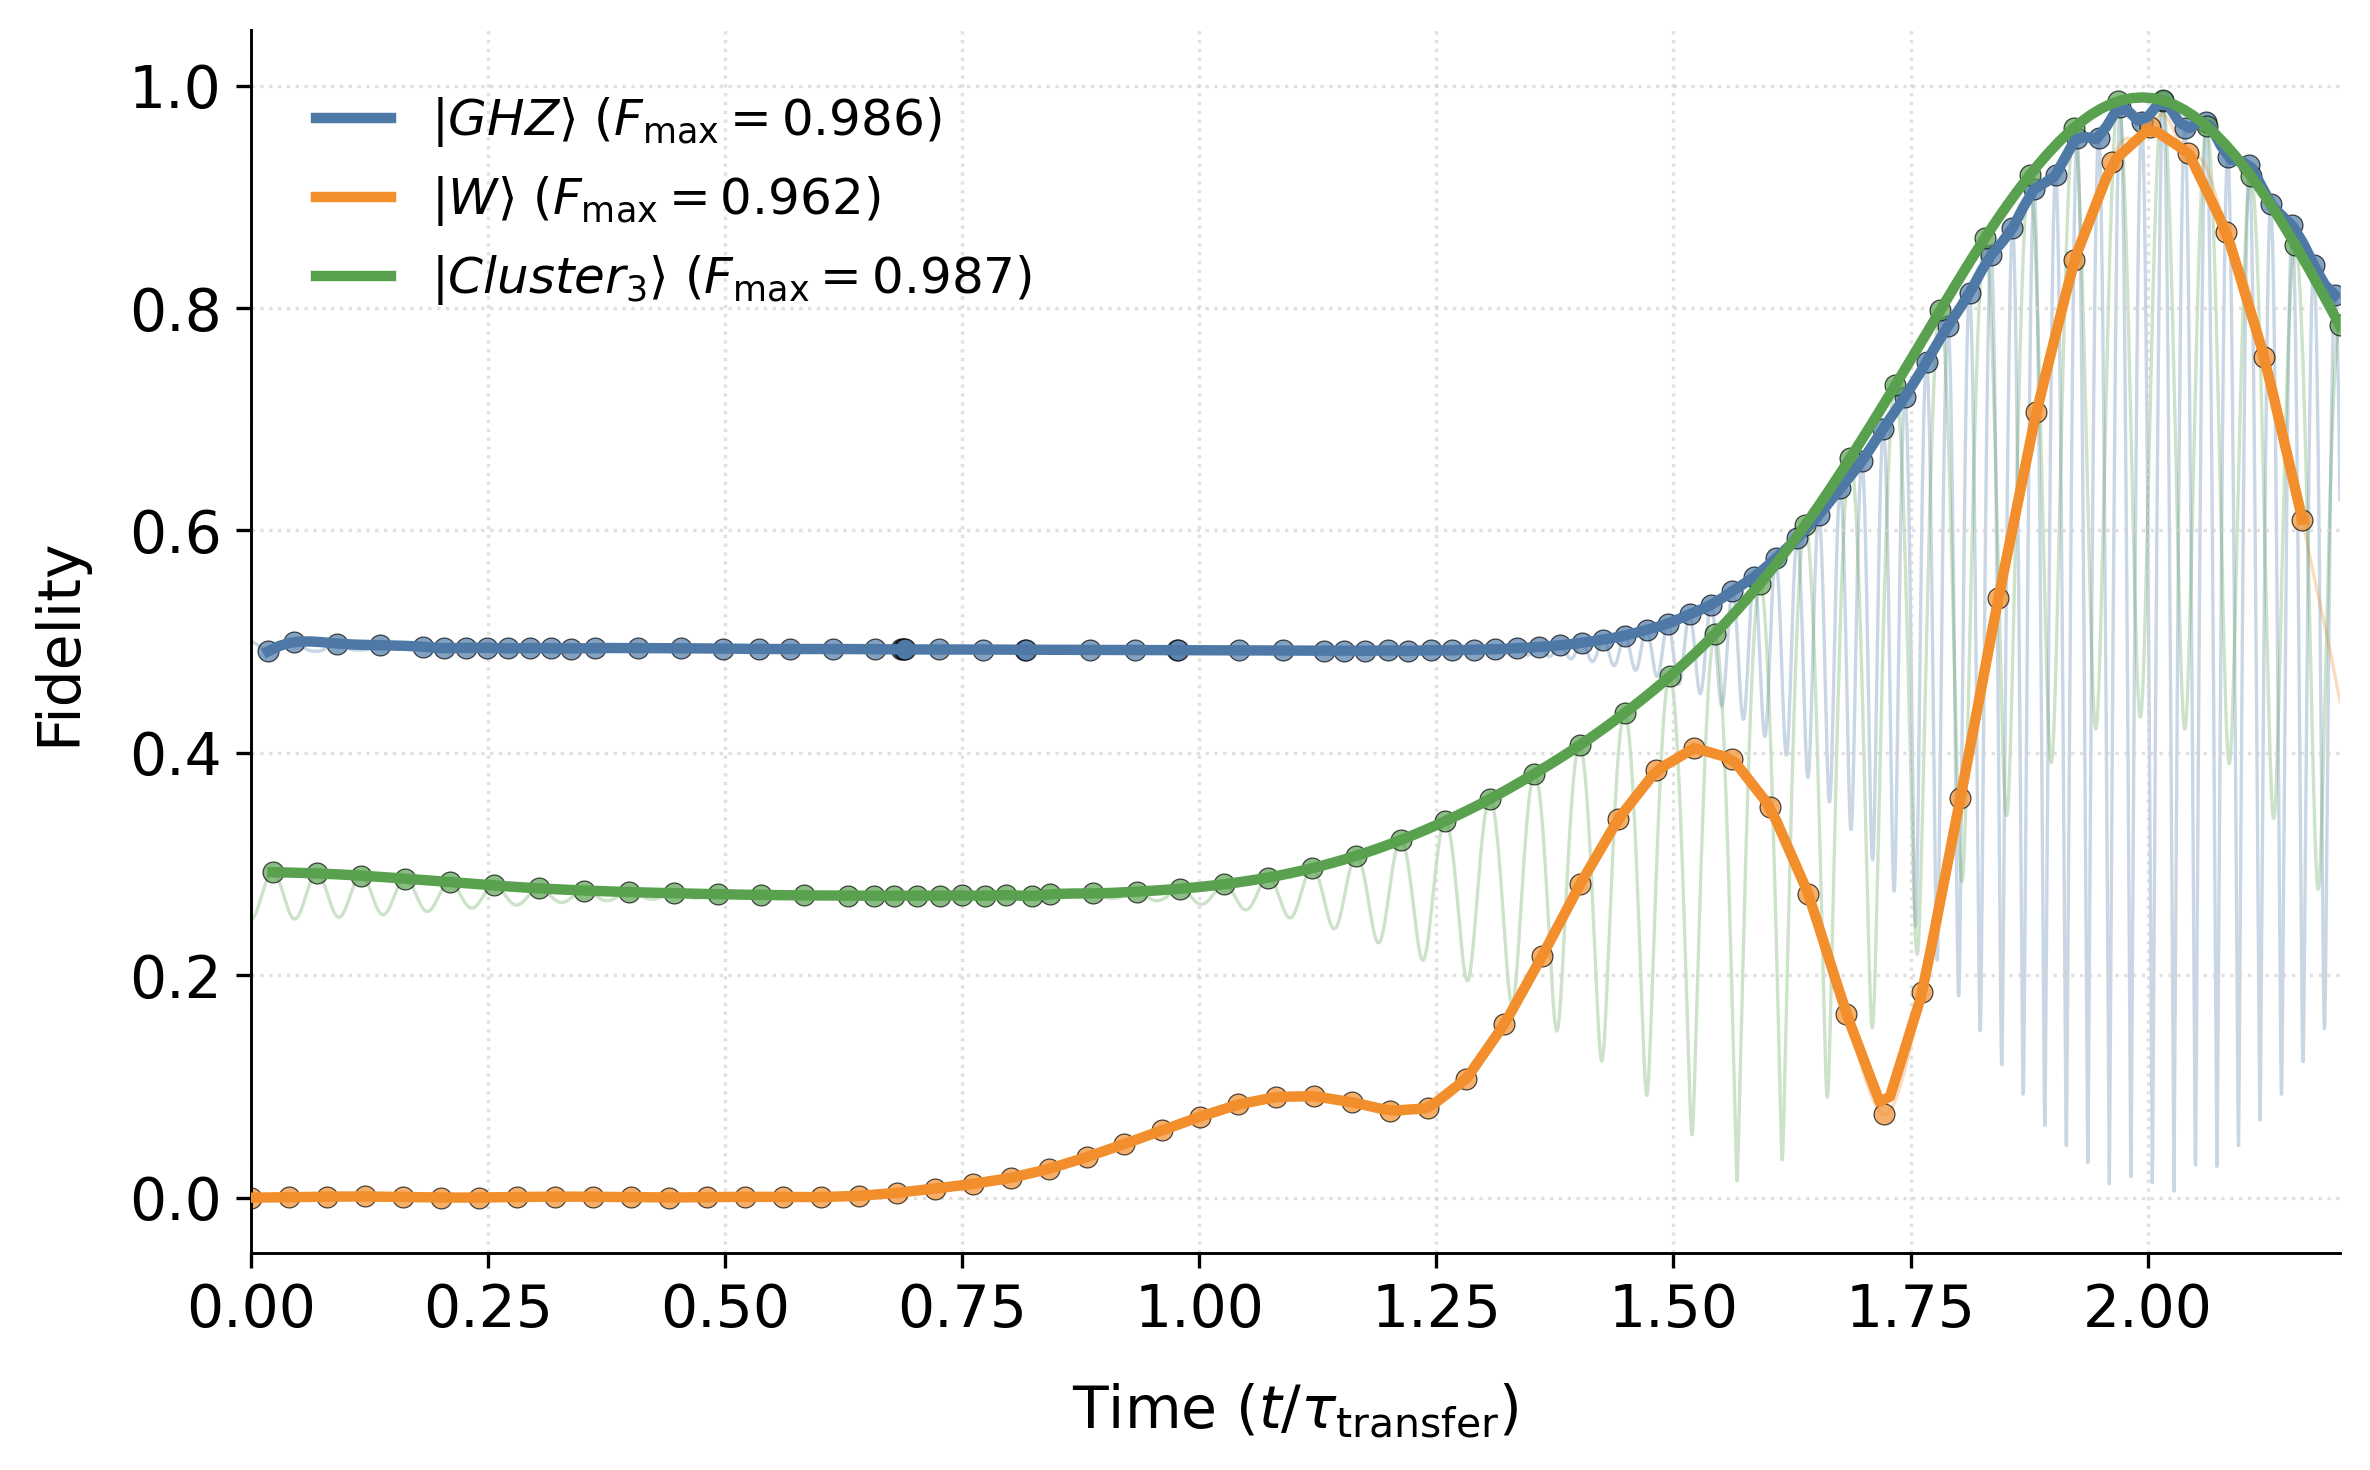

In [14]:
plots.plot_three_fidelity_curves(
    num_steps=len(fidelity_cluster_3),
    fidelity_data_list=[fidelity_ghz, fidelity_w, fidelity_cluster_3],
    labels=[r'$|GHZ\rangle$', r'$|W\rangle$', r'$|Cluster_3\rangle$'],
    min_peak_height=0.25,
    min_peak_frequency=0.005,        # Stricter frequency threshold
    marker_frequency=100,           # More frequent markers
    filepath="/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/figures/fidelity/paper_revision/3_qubit"

)

# J vs Lambda

In [58]:
#Constant simulation parameters
N = 12
J = 0.5
ti = 0
step_number = 6000

ratios = range(1,41) # will be used to calculate J accordingly


# Generate initial and target statess
# state_dictionary = {"1":1}
# state_dictionary = {"1":1, "0":1}
# state_dictionary = {"11":1, "00":1}
# state_dictionary = {"111":1, "000":1}

# state_dictionaries = [{"1":1}, {"1":1, "0":1}, {"11":1, "00":1}]
state_dictionaries = [{"111":1, "000":1}]
state_dictionaries = [{"1":1}, {"1":1, "0":1}, {"10":1, "01":1}, {"111":1, "000":1}]
filenames = []
for dictionary in state_dictionaries:

    initial_system, final_system, register_size = initialize_system(dictionary, N)
    maximum_fidelities = []

    for ratio in ratios:
        lmd = J/ratio
        tf = np.pi/lmd
        H_transport, H_reset = build_hamiltonians(N, lmd, J, register_size)
        total_full_fidelity, magnetizations, corrected_fidelity = dyn.OneStepAlgorithm(initial_system, final_system, H_transport, ti, tf, step_number, factor = 1.1)
        maximum_fidelities.append(max(total_full_fidelity))
        print("Ratio:", ratio, "Error:", 1-max(total_full_fidelity))

    ratio_filename = dh.create_data_filename(N, f'{ratios[-1]}', lmd, dictionary, 'ratio')
    dh.save_plot_data_to_csv(ratios, maximum_fidelities, f'../data_files/ratios/paper_modification/{ratio_filename}')
    filenames.append(ratio_filename)

Ratio: 1 Error: 0.7751899427002348
Ratio: 2 Error: 0.8504786381627756
Ratio: 3 Error: 0.3673552752595203
Ratio: 4 Error: 0.3095030060659828
Ratio: 5 Error: 0.19174894541243592
Ratio: 6 Error: 0.13783013699188773
Ratio: 7 Error: 0.10701969604988548
Ratio: 8 Error: 0.08659171495274509
Ratio: 9 Error: 0.06829652559027988
Ratio: 10 Error: 0.05186772902660941
Ratio: 11 Error: 0.040677115462722235
Ratio: 12 Error: 0.03278260957735035
Ratio: 13 Error: 0.027002490114134803
Ratio: 14 Error: 0.022645074355409633
Ratio: 15 Error: 0.01927875338637397
Ratio: 16 Error: 0.01662328726512563
Ratio: 17 Error: 0.014487864596798294
Ratio: 18 Error: 0.012746914337806725
Ratio: 19 Error: 0.01130699997944562
Ratio: 20 Error: 0.01010055324883774
Ratio: 21 Error: 0.009081449994919444
Ratio: 22 Error: 0.008211069638712765
Ratio: 23 Error: 0.007461967969152883
Ratio: 24 Error: 0.006813256102974896
Ratio: 25 Error: 0.006249035493037902
Ratio: 26 Error: 0.005749749456841147
Ratio: 27 Error: 0.005309408820554085
Ra

In [59]:
ratios_1,    values_1,    recovered_filename_1 = dh.read_plot_data_from_csv   (f"../data_files/ratios/paper_modification/{filenames[0]}.csv")
ratios_plus, values_plus, recovered_filename_plus = dh.read_plot_data_from_csv(f"../data_files/ratios/paper_modification/{filenames[1]}.csv")
ratios_bell, values_bell, recovered_filename_bell = dh.read_plot_data_from_csv(f"../data_files/ratios/paper_modification/{filenames[2]}.csv")
ratios_ghz,  values_ghz,  recovered_filename_ghz = dh.read_plot_data_from_csv (f"../data_files/ratios/paper_modification/{filenames[3]}.csv")


log_ratios_1,    log_errors_1    =  ratios_1,    [1- val for val in values_1]           
log_ratios_plus, log_errors_plus =  ratios_plus, [1- val for val in values_plus]
log_ratios_bell, log_errors_bell =  ratios_bell, [1- val for val in values_bell]
log_ratios_ghz,  log_errors_ghz  =  ratios_ghz,  [1- val for val in values_ghz]

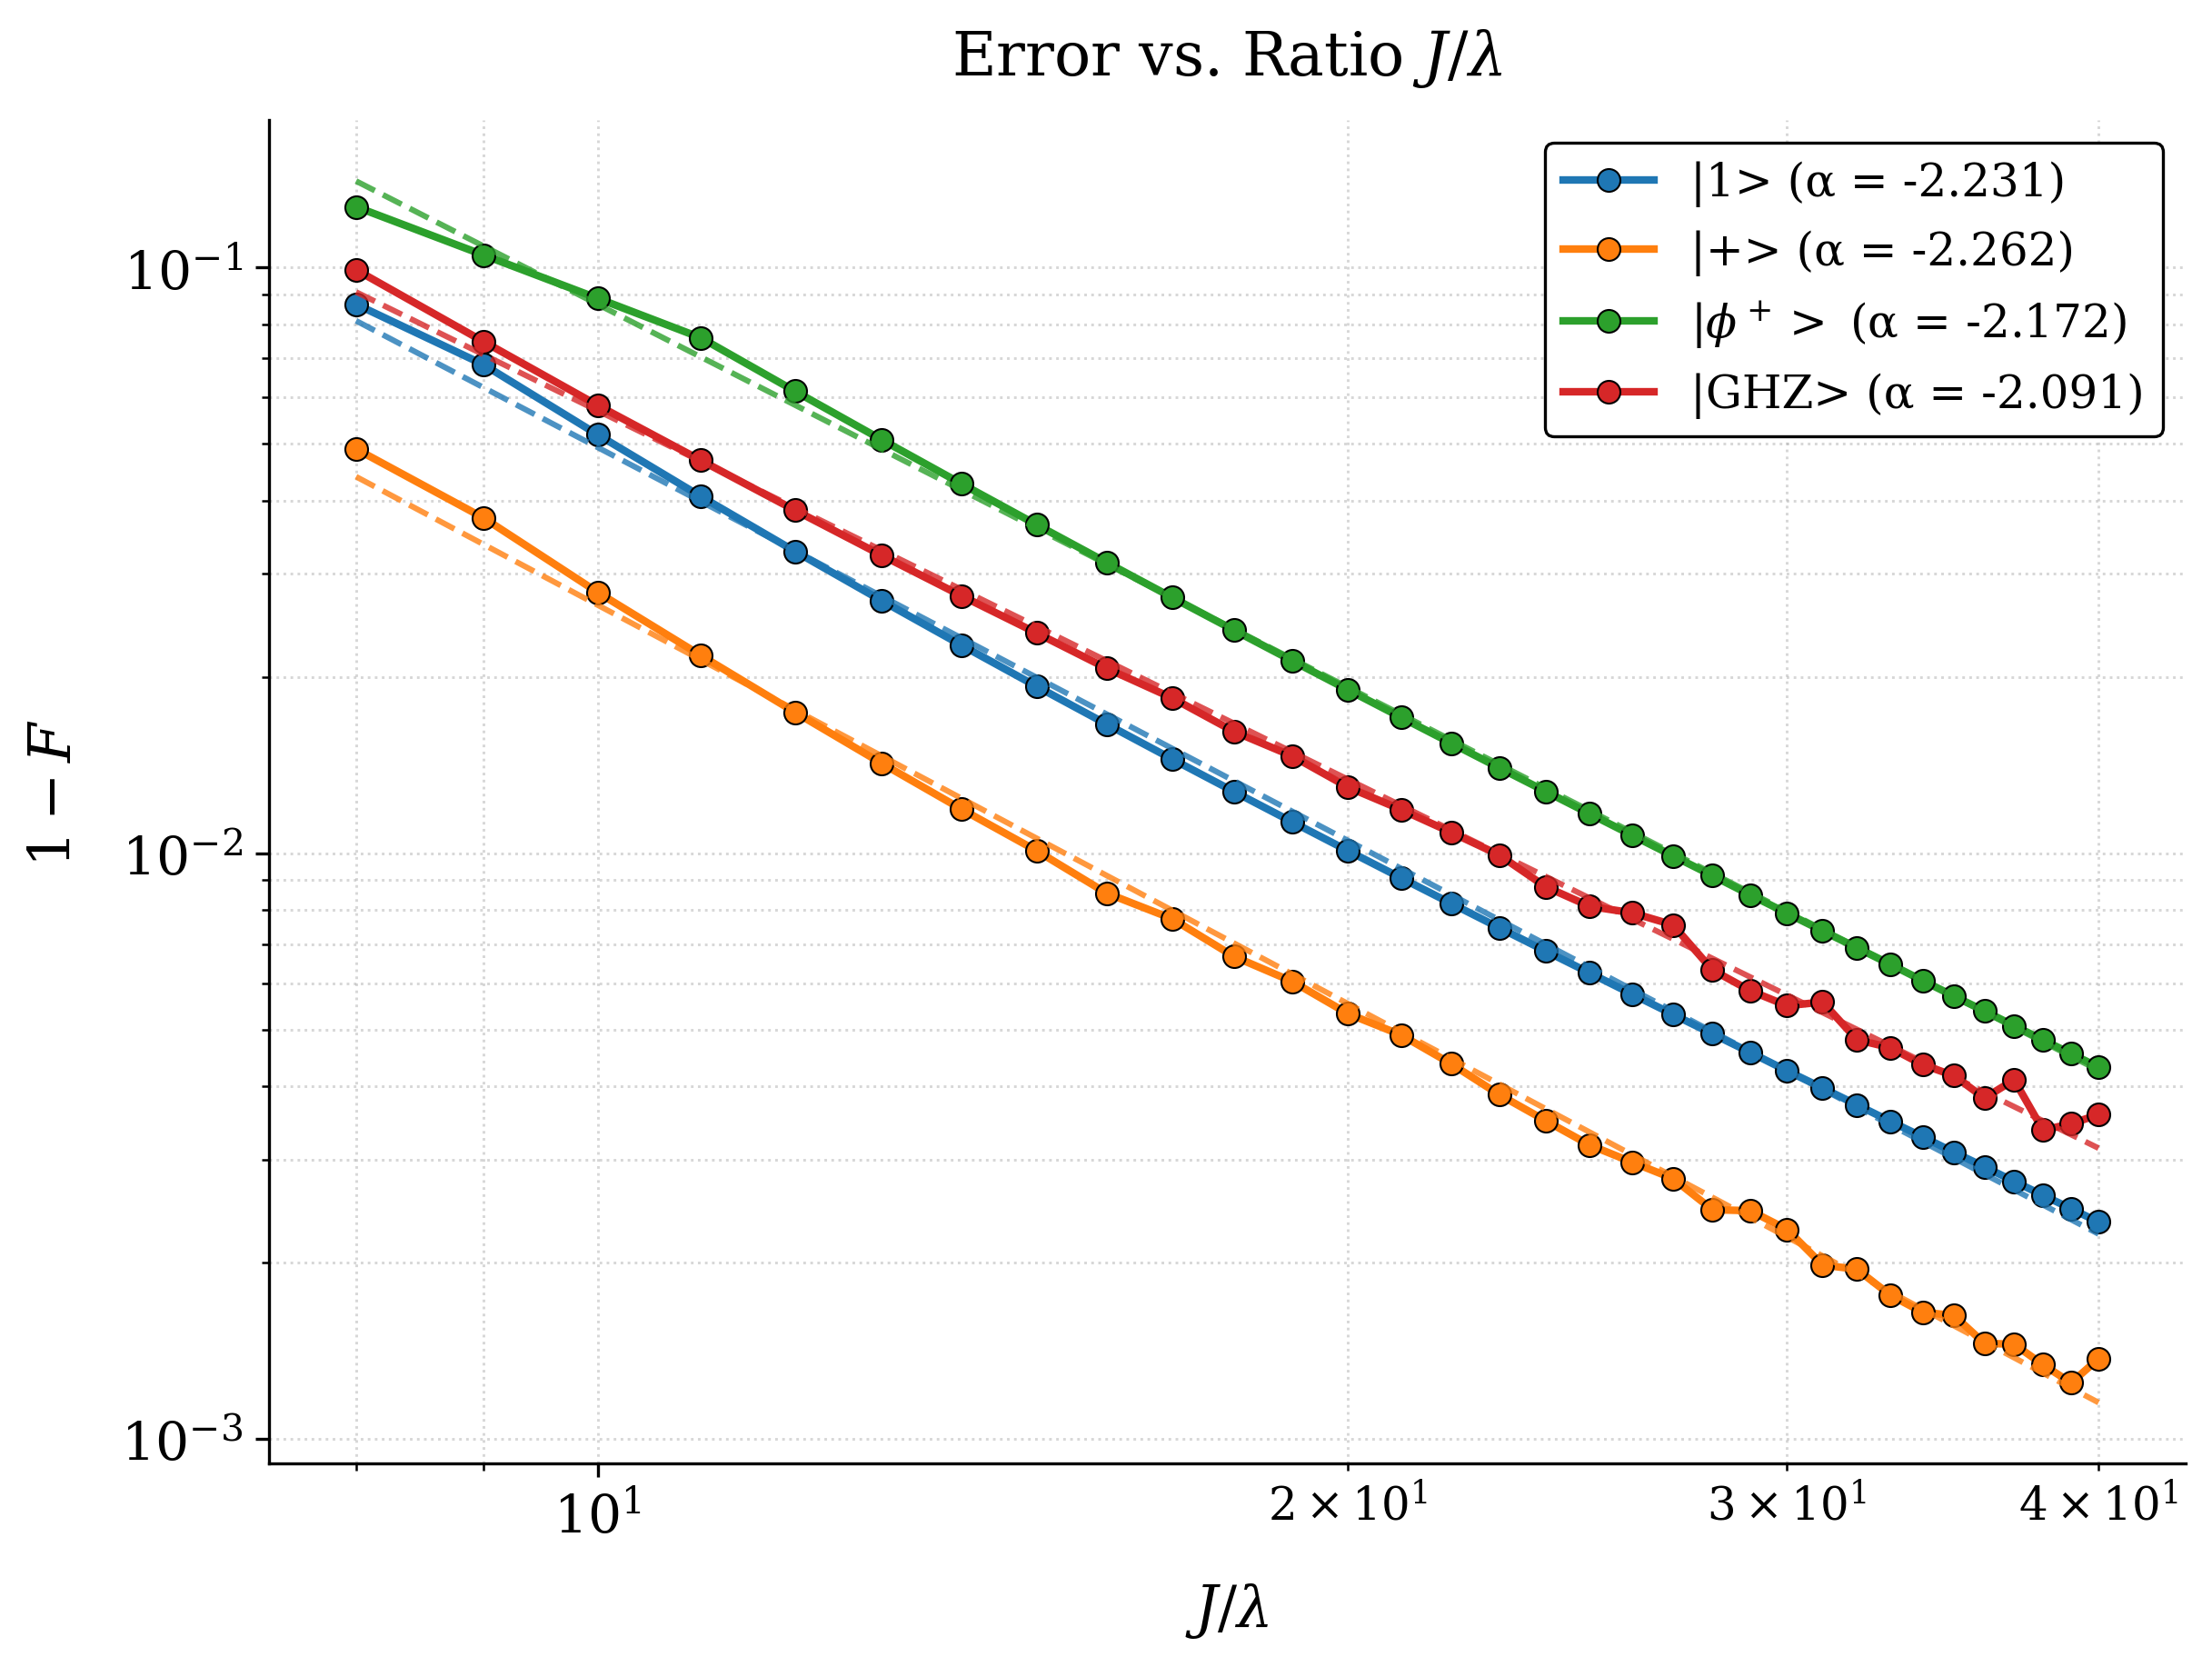

In [60]:
min_index =7
max_index = 40
error_dictionary = {'|1>':log_errors_1[min_index:max_index], '|+>':log_errors_plus[min_index:max_index],'$|\phi^+>$':log_errors_bell[min_index:max_index], '|GHZ>':log_errors_ghz[min_index:max_index]}
plots.plot_multiple_ratio_trend_slope_2(x_data = log_ratios_1[min_index:max_index], y_data_dict=error_dictionary, log_scale=False, show_trend=True, filepath='../figures/paper_modification/ratio_all_curves_final_4')

# Errors

In [5]:
def select_error(err, error_type):
    if error_type == "j":
        return err, 0, 0
    elif error_type == "l":
        return 0, err, 0
    elif error_type == "z":
         return 0, 0, err
    else:
        raise ValueError(f"{error_type} is not a valid type of error, only \'j\', \'l\', and \'z\' allowed")

def error_loop(N, lmd, J, ti, tf, Nsteps, Nshots, error_list, error_type, register_size = None):
    fidelity_means = np.array([])
    fidelity_errors = np.array([])
    for err in error_list:
        fidelities = []
        for _ in range(Nshots):

            j_err, l_err, z_err = select_error(err, error_type)

            #Run simulations, add fidelities, and save average of n_shots
            H_t = Ham.Hamiltonian(system_size = N,
                        mode = "transport",
                        lambda_factor = lmd,
                        global_J = J,
                        j_error = j_err,
                        l_error = l_err,
                        z_error = z_err
                        )
            
            fidelities.append(dyn.LightweightAlgorithm(initial_system, final_system, ti, tf, Nsteps, H_t))
            

        fmean, ferror = calculate_result_statistics(fidelities)
        fidelity_means = np.append(fidelity_means, fmean)
        fidelity_errors = np.append(fidelity_errors, ferror)

    return fidelity_means, fidelity_errors


def calculate_result_statistics(fidelity):
    fidelity_mean = np.mean(fidelity)
    fidelity_error = np.std(fidelity, ddof=1) / np.sqrt(len(fidelity))

    return fidelity_mean, fidelity_error

In [6]:
N=8
lmd = 0.02272
J = 0.5
state_dictionary = {"1":1}

ti = 0
tf = np.pi/lmd
Nsteps = 500

l_errors = np.linspace(0.01, 0.1, 10)
Nshots = 10

initial_system, final_system, register_size = initialize_system(state_dictionary, N)

fidelities, fidelity_errors = error_loop(N, lmd, J, ti, tf, Nsteps, Nshots, l_errors, "l", register_size)


In [7]:
# Save three arrays together
dh.save_three_arrays(l_errors, fidelities, fidelity_errors,
                 '../../files/errors/l_err_N8_10_points_10_shots',
                 description='Z errors vs fidelity data for experiment 1')

Three arrays successfully saved to: ../../files/errors/l_err_N8_10_points_10_shots.npz
Metadata saved to: ../../files/errors/l_err_N8_10_points_10_shots_metadata.txt


Successfully loaded three arrays from: ../../files/errors/l_err_N8_10_points_10_shots.npz
Array shapes: (10,), (10,), (10,)


FileNotFoundError: [Errno 2] No such file or directory: '../../figures/errors/figure_fidelity_vs_lerr_l_err_N8_10_points_10_shots.pdf'

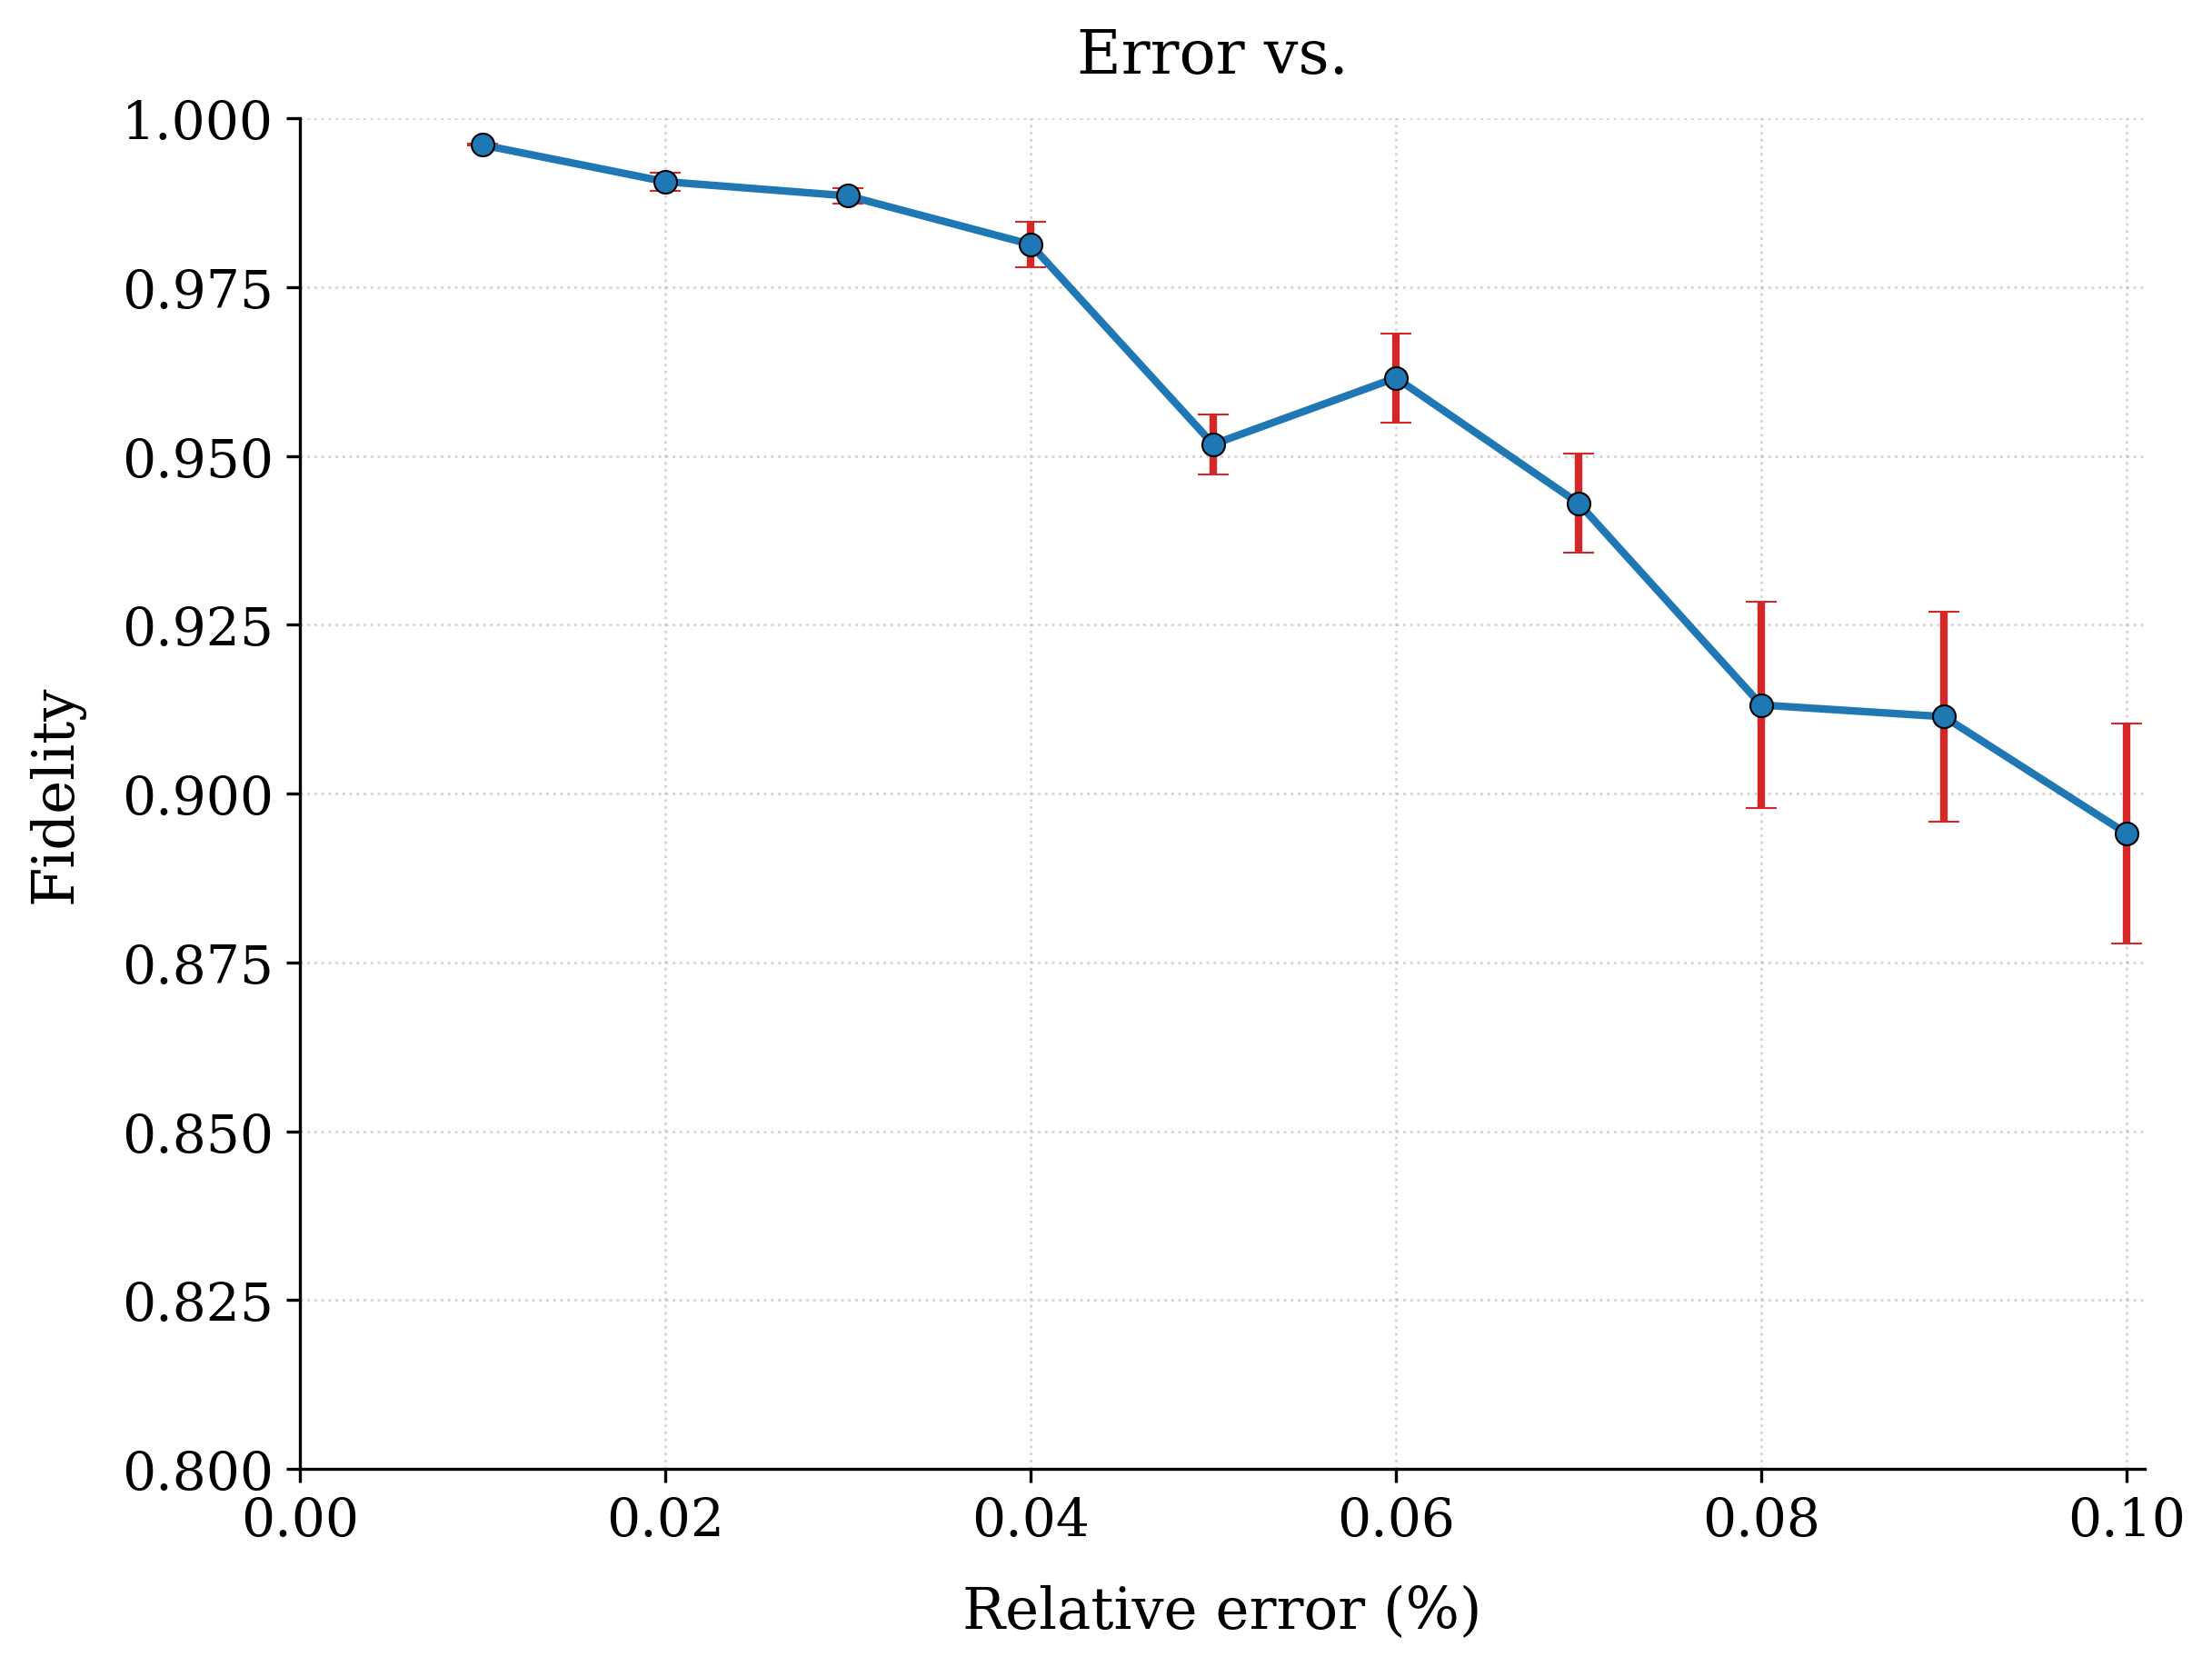

In [ ]:
loaded_x, loaded_means, loaded_errors = dh.fetch_three_arrays('../../files/errors/l_err_N8_10_points_10_shots')

plots.plot_fidelity_vs_error(loaded_x, loaded_means, loaded_errors,
                       title='Error vs. ',
                       xlabel='Relative error (%)',
                       save_figure=True,
                       save_path='../../figures/errors',
                       file_tag='l_err_N8_10_points_10_shots')